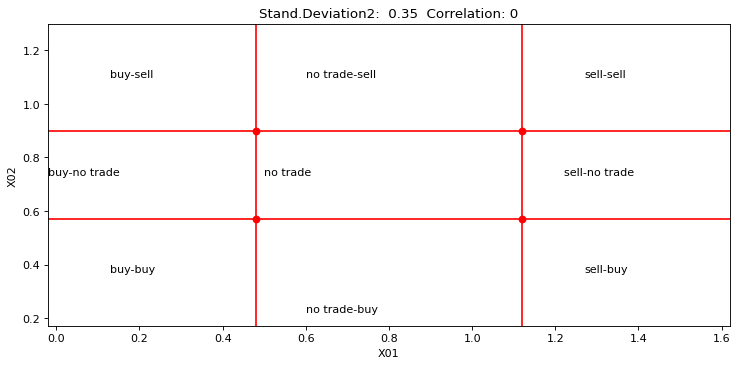

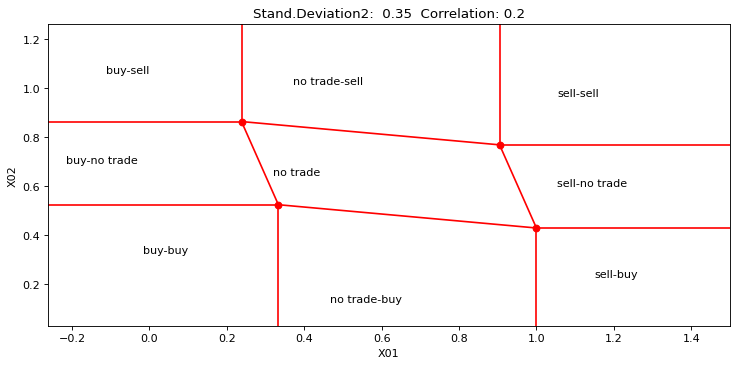

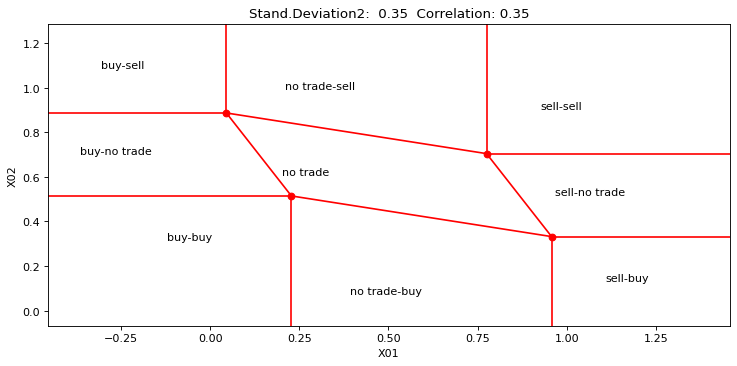

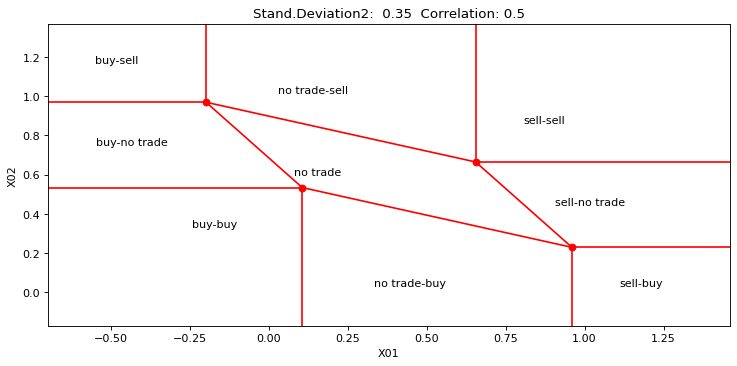

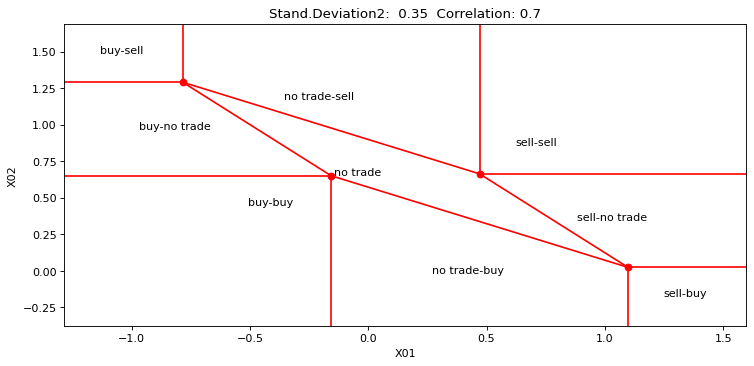

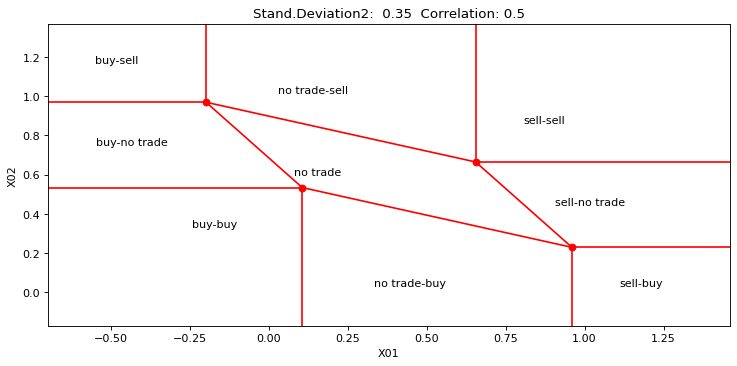

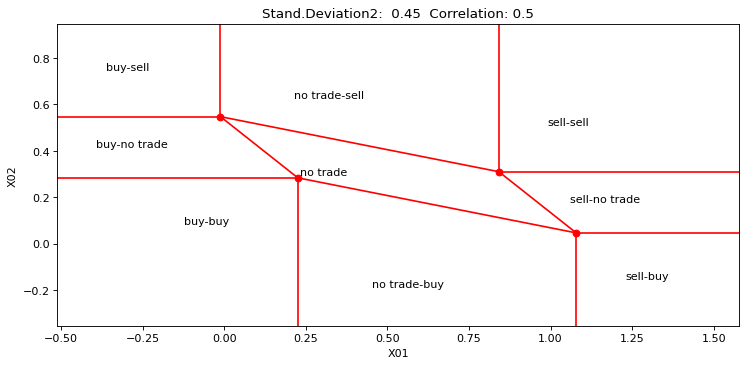

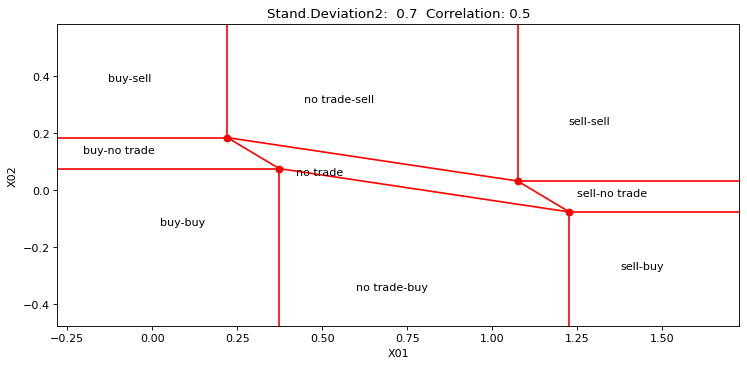

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11.0, 5.0]
plt.rcParams['figure.dpi'] = 80


def plt_region(corr, sd2): 
    rf = 0.03
    mu = np.array([0.08, 0.12])
    sigma_fun = lambda rho: np.array([[0.25**2, rho*0.25*sd2], [rho*0.25*sd2,sd2**2]])
    sigma = sigma_fun(corr)
    b = 0.02
    v1 = sigma[0,0]
    v2 = sigma[1,1]

    gamma = 1

    x1_buy_buy = 1/(gamma * v1) * (mu[0] - rf + sigma[0,1]/v2 * (-mu[1] + rf + b) - b)/(1 - ((sigma[0,1]**2)/(v1*v2)))
    x1_buy_sell = 1/(gamma * v1) * (mu[0] -rf + sigma[0,1]/v2 * (-mu[1] + rf - b) - b)/(1 - ((sigma[0,1]**2)/(v1*v2)))   
    x1_sell_buy = 1/(gamma * v1) * (mu[0] -rf + sigma[0,1]/v2 * (-mu[1] + rf + b) + b)/(1 - ((sigma[0,1]**2)/(v1*v2)))
    x1_sell_sell = 1/(gamma * v1) * (mu[0] -rf + sigma[0,1]/v2 * (-mu[1] + rf - b) + b)/(1 - ((sigma[0,1]**2)/(v1*v2)))

    x2_sell_sell =  1/(gamma * v2) * (mu[1] -rf + sigma[0,1]/v1 * (-mu[0] + rf - b) + b)/(1 - ((sigma[0,1]**2)/(v1*v2))   )            
    x2_sell_buy =  1/(gamma * v2) * (mu[1] -rf + sigma[0,1]/v1 * (-mu[0] + rf - b) - b)/(1 - ((sigma[0,1]**2)/(v1*v2)))
    x2_buy_buy =  1/(gamma * v2) * (mu[1] -rf + sigma[0,1]/v1 * (-mu[0] + rf + b) - b)/(1 - ((sigma[0,1]**2)/(v1*v2)))
    x2_buy_sell = 1/(gamma * v2) * (mu[1] -rf + sigma[0,1]/v1 * (-mu[0] + rf + b) + b)/(1 - ((sigma[0,1]**2)/(v1*v2)))

    x1 = [x1_buy_buy, x1_buy_sell, x1_sell_buy, x1_sell_sell]
    x2 =  [x2_buy_buy, x2_buy_sell, x2_sell_buy, x2_sell_sell]
    
    plt.plot(x1_buy_buy, x2_buy_buy, marker="o", label ="buy-buy", color = "red" )
    plt.annotate("buy-buy", (x1_buy_buy, x2_buy_buy), xytext = (x1_buy_buy-0.35, x2_buy_buy-0.2))
    
    plt.plot(x1_buy_sell, x2_buy_sell, marker = "o", label = "buy-sell", color = "red")
    plt.annotate("buy-sell", (x1_buy_sell, x2_buy_sell), xytext = (x1_buy_sell-0.35, x2_buy_sell+0.2))
    
    plt.plot(x1_sell_sell, x2_sell_sell, marker="o", label ="sell-sell", color = "red")
    plt.annotate("sell-sell", (x1_sell_sell, x2_sell_sell), xytext = (x1_sell_sell+0.15, x2_sell_sell+0.2))
    
    plt.plot(x1_sell_buy, x2_sell_buy, marker = "o", label = "sell-buy", color = "red")
    plt.annotate("sell-buy", (x1_sell_buy, x2_sell_buy), xytext = (x1_sell_buy+0.15, x2_sell_buy-0.2))
    
    #no trade zone 
    no_sell = ( (x1_buy_sell + x1_sell_sell)/2 -0.2 ,  (x2_buy_sell + x2_sell_sell)/2 +0.2)
    plt.annotate("no trade-sell", xy= no_sell, xytext=no_sell)
    
    no_buy = ( (x1_buy_buy + x1_sell_buy)/2 -0.2 ,  (x2_buy_buy + x2_sell_buy)/2 -0.35)
    plt.annotate("no trade-buy", xy= no_buy, xytext=no_buy)
    
    buy_no =  ( (x1_buy_sell + x1_buy_buy)/2 -0.5 ,  (x2_buy_sell + x2_buy_buy)/2 )
    plt.annotate("buy-no trade", xy = buy_no, xytext=buy_no)
    
    sell_no =  ( (x1_sell_sell + x1_sell_buy)/2 +0.1 ,  (x2_sell_sell + x2_sell_buy)/2 )
    plt.annotate("sell-no trade", xy = sell_no, xytext=sell_no)
    
    no_no =  ( (x1_buy_sell + x1_sell_buy)/2 -0.3 ,  (x2_sell_sell + x2_buy_buy)/2 )
    plt.annotate("no trade", xy = no_no, xytext=no_no)
    #connection lines 
    plt.plot([x1_buy_sell, x1_sell_sell], [x2_buy_sell, x2_sell_sell], color = "red")
    plt.plot([x1_sell_buy, x1_sell_sell], [x2_sell_buy, x2_sell_sell], color = "red")
    plt.plot([x1_sell_buy, x1_buy_buy], [x2_sell_buy, x2_buy_buy], color = "red")
    plt.plot([x1_buy_sell, x1_buy_buy], [x2_buy_sell, x2_buy_buy], color = "red")
    
    #vertical lines
    plt.plot([x1_buy_sell, x1_buy_sell], [x2_buy_sell, 10], color = "red")
    plt.plot([x1_sell_sell, x1_sell_sell], [x2_sell_sell, 10], color = "red")
    plt.plot([x1_buy_buy, x1_buy_buy], [x2_buy_buy, -10], color = "red")
    plt.plot([x1_sell_buy, x1_sell_buy], [x2_sell_buy, -10], color ="red")
   
    
    #horizontal lines
    plt.plot([x1_buy_sell, -10], [x2_buy_sell, x2_buy_sell], color = "red")
    plt.plot([x1_buy_buy, -10], [x2_buy_buy, x2_buy_buy],color = "red")
    plt.plot([x1_sell_sell, 10], [x2_sell_sell, x2_sell_sell],color = "red")
    plt.plot([x1_sell_buy, 10], [x2_sell_buy, x2_sell_buy],color = "red")
    

    
   # plt.legend()
    plt.ylabel("X02")
    plt.xlabel("X01")
    plt.xlim((min(x1)-0.5, max(x1)+0.5))
    plt.ylim((min(x2)-0.4, max(x2)+0.4))
    plt.title(f"Stand.Deviation2:  {sd2}  Correlation: {corr}")
    plt.show()
    





cor = [0,0.2,0.35,0.5,0.7]
for c in cor:
    plt_region(c, 0.35)

sd = [0.35, 0.45,0.7]
for sd_2 in sd:
    plt_region(0.5, sd_2)


In [2]:
#(c)

#We can observe from the above plots that with increasing correlation between the two assets, the no-trade region is drawn out in length and therefore gets smaller.
#With a correlation of 0, the no trade region is a rectangle and the decision to trade for each asset does not depend on the other asset.
#When the correlation converges to 1, the no-trade region is going to zero.
#Also in the case with increasing volatility, the no-trade region is getting squeezed together from the top and bottom and therefore gets smaller